In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("data/WATCHLIST.csv")

In [3]:
n_movies = len(df)
print(n_movies)

800


In [4]:
df.head()

,Position,Const,Created,Modified,Description,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Your Rating,Date Rated
0,1,tt0111161,2012-07-05,2012-07-05,NaN,The Shawshank Redemption,https://www.imdb.com/title/tt0111161/,movie,9.3,142,1994,Drama,2759556,1994-09-10,Frank Darabont,10,2012-07-05
1,2,tt0068646,2012-07-05,2012-07-05,NaN,The Godfather,https://www.imdb.com/title/tt0068646/,movie,9.2,175,1972,"Crime, Drama",1920318,1972-03-14,Francis Ford Coppola,7,2012-09-15
2,3,tt0468569,2012-07-05,2012-07-05,NaN,The Dark Knight,https://www.imdb.com/title/tt0468569/,movie,9.0,152,2008,"Action, Crime, Drama, Thriller",2732541,2008-07-14,Christopher Nolan,8,2012-07-19
3,4,tt0137523,2012-07-05,2012-07-05,NaN,Fight Club,https://www.imdb.com/title/tt0137523/,movie,8.8,139,1999,Drama,2197181,1999-09-10,David Fincher,9,2012-07-05
4,5,tt1375666,2012-07-05,2012-07-05,NaN,Inception,https://www.imdb.com/title/tt1375666/,movie,8.8,148,2010,"Action, Adventure, Sci-Fi, Thriller",2424924,2010-07-08,Christopher Nolan,9,2012-07-05


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Position        800 non-null    int64  
 1   Const           800 non-null    object 
 2   Created         800 non-null    object 
 3   Modified        800 non-null    object 
 4   Description     0 non-null      float64
 5   Title           800 non-null    object 
 6   URL             800 non-null    object 
 7   Title Type      800 non-null    object 
 8   IMDb Rating     800 non-null    float64
 9   Runtime (mins)  800 non-null    int64  
 10  Year            800 non-null    int64  
 11  Genres          799 non-null    object 
 12  Num Votes       800 non-null    int64  
 13  Release Date    800 non-null    object 
 14  Directors       793 non-null    object 
 15  Your Rating     800 non-null    int64  
 16  Date Rated      800 non-null    object 
dtypes: float64(2), int64(5), object(10)

In [6]:
df.describe()

,Position,Description,IMDb Rating,Runtime (mins),Year,Num Votes,Your Rating
count,800.000000,0.0,800.000000,800.000000,800.000000,8.000000e+02,800.000000
mean,398.667500,NaN,7.488625,116.391250,2005.353750,3.330094e+05,7.630000
std,230.822731,NaN,0.756355,31.858231,15.698381,4.014476e+05,1.315395
min,1.000000,NaN,1.700000,12.000000,1933.000000,1.500000e+01,1.000000
25%,198.750000,NaN,7.100000,99.000000,2002.000000,6.247925e+04,7.000000
50%,398.500000,NaN,7.600000,113.000000,2010.000000,1.834225e+05,8.000000
75%,598.250000,NaN,8.000000,130.000000,2015.250000,4.664140e+05,8.000000
max,798.000000,NaN,9.300000,557.000000,2023.000000,2.759556e+06,10.000000


In [7]:
df['Title Type'].unique()

array(['movie', 'tvMovie', 'short', 'tvMiniSeries', 'tvSeries', 'tvShort',
       'tvSpecial'], dtype=object)

In [8]:
df = df[df['Title Type'].isin(['movie', 'tvMovie'])]

In [9]:
len(df)

788

In [10]:
len(df.Directors.unique())

536

In [11]:
len(df.Year.unique())

76

In [12]:
sum(df["Runtime (mins)"]) / 60

1529.2333333333333

In [13]:
sum(df["Runtime (mins)"]) / n_movies

114.6925

In [14]:
np.mean(df["IMDb Rating"])

7.480203045685277

In [15]:
np.std(df["IMDb Rating"])

0.7535627456053862

In [16]:
np.mean(df["Your Rating"])

7.619289340101523

In [17]:
np.std(df["Your Rating"])

1.3097577962395286

In [18]:
pd.DataFrame(df.groupby(['Directors']).size())

,0
Directors,
"Aamir Khan, Amole Gupte",1
Abbas Kiarostami,1
Abdullah Mohammed Saad,1
Adam Elliot,1
Adam McKay,1
...,...
Zach Braff,1
Zack Snyder,1
Zaza Urushadze,1


https://www.analyticsvidhya.com/blog/2022/03/exploratory-data-analysis-with-an-example/

# Your Rating

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
sns.set(rc={'figure.figsize':(15,7)})

In [24]:
my_average_rating = np.mean(df['Your Rating'])
my_average_rating

7.619289340101523

In [25]:
df['Release Year'] = df['Release Date'].str.split('-').str[0]
df['Above average'] = df['Your Rating'].map(lambda rating: 'Yes' if rating > my_average_rating else 'No')

In [26]:
df.head()

,Position,Const,Created,Modified,Description,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Your Rating,Date Rated,Release Year,Above average
0,1,tt0111161,2012-07-05,2012-07-05,NaN,The Shawshank Redemption,https://www.imdb.com/title/tt0111161/,movie,9.3,142,1994,Drama,2759556,1994-09-10,Frank Darabont,10,2012-07-05,1994,Yes
1,2,tt0068646,2012-07-05,2012-07-05,NaN,The Godfather,https://www.imdb.com/title/tt0068646/,movie,9.2,175,1972,"Crime, Drama",1920318,1972-03-14,Francis Ford Coppola,7,2012-09-15,1972,No
2,3,tt0468569,2012-07-05,2012-07-05,NaN,The Dark Knight,https://www.imdb.com/title/tt0468569/,movie,9.0,152,2008,"Action, Crime, Drama, Thriller",2732541,2008-07-14,Christopher Nolan,8,2012-07-19,2008,Yes
3,4,tt0137523,2012-07-05,2012-07-05,NaN,Fight Club,https://www.imdb.com/title/tt0137523/,movie,8.8,139,1999,Drama,2197181,1999-09-10,David Fincher,9,2012-07-05,1999,Yes
4,5,tt1375666,2012-07-05,2012-07-05,NaN,Inception,https://www.imdb.com/title/tt1375666/,movie,8.8,148,2010,"Action, Adventure, Sci-Fi, Thriller",2424924,2010-07-08,Christopher Nolan,9,2012-07-05,2010,Yes


In [27]:
df['Your Rating'].unique()

array([10,  7,  8,  9,  5,  6,  2,  3,  4,  1])

In [28]:
sum([0.0025, 0.00125, 0.00875, 0.01875, 0.035, 0.08875, 0, 0, 0, 0.0225]
)

0.1775

In [29]:
ratings_frequencies

NameError: name 'ratings_frequencies' is not defined

In [ ]:
ratings_frequencies = df.groupby(['Your Rating'])['Your Rating'].count().map(lambda x: x / len(df))
explode = [1 if r < 0.005 else 0 for r in ratings_frequencies.values]

ratings_frequencies.plot.pie(y="Your Rating", figsize=(8, 8), explode=2*ratings_frequencies.values[::-1], autopct='%1.1f%%', colors=sns.color_palette("coolwarm", 10), startangle=0)
plt.legend(sorted(df['Your Rating'].unique()), loc="lower left")

**⚠ WARNING** When testing Viz, better try to visualize on just a subset of data

In [ ]:
# sns.set_theme(style="darkgrid")
sns.displot(data=df, x="Year", col="Above average", kde=True)

In [ ]:
sns.histplot(
    df,
    x="Year", hue="Above average",
    stat="count",
    multiple="stack",
    binwidth=1,
    palette={"Yes": "#31cdde", "No": "#759396"},
    edgecolor=".3",
    linewidth=.5,
)

In [ ]:
sns.histplot(
    df,
    x="Year", hue="Above average",
    multiple="fill",
    stat="percent",
    binwidth=1,
    palette={"Yes": "#31cdde", "No": "#759396"},
    edgecolor=".3",
    linewidth=.5,
)

In [30]:
years_frequencies = df.groupby(["Year"])['Year'].count()
years_frequencies

Year
1933     1
1935     1
1939     1
1941     2
1942     1
        ..
2019    16
2020    13
2021    21
2022    26
2023     6
Name: Year, Length: 76, dtype: int64

<AxesSubplot:xlabel='Year', ylabel='Year'>

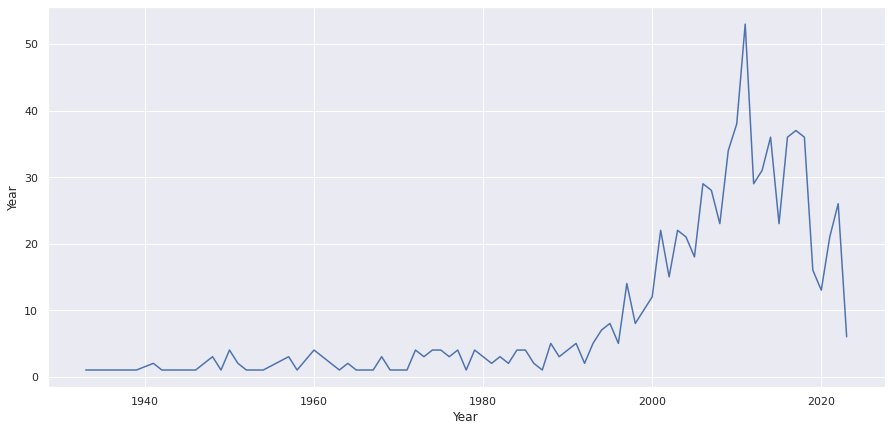

In [31]:
sns.lineplot(data=years_frequencies)

In [32]:
years_frequencies.sum()

788

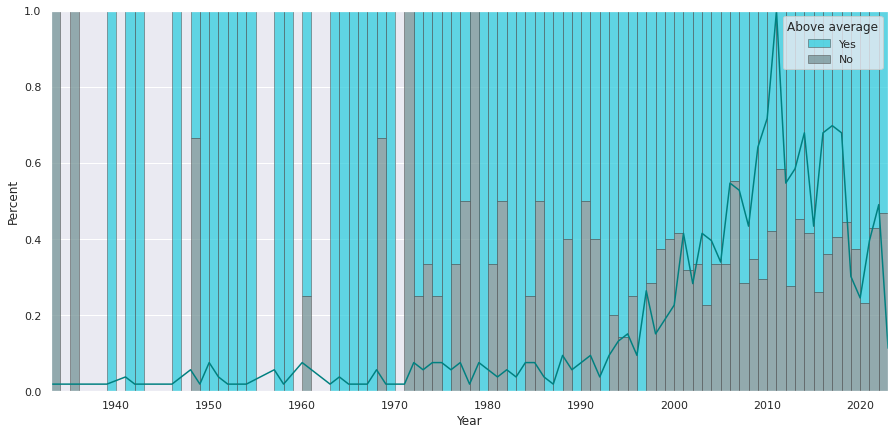

In [33]:
years_frequencies = df.groupby(["Year"])['Year'].count() / len(df)

z = sns.histplot(
    df,
    x="Year", hue="Above average",
    multiple="fill",
    stat="percent",
    binwidth=1,
    # kde=True,
    palette={"Yes": "#31cdde", "No": "#759396"},
    edgecolor=".3",
    linewidth=.5,
)
z = sns.lineplot(data=years_frequencies / max(years_frequencies), color='teal')

In [34]:
hue_order = df['Your Rating'].unique()
hue_order = sorted(hue_order)
hue_order

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [35]:
df['Your Rating (cat)'] = pd.Categorical(df['Your Rating'])

In [36]:
df['Your Rating (cat)']

0      10
1       7
2       8
3       9
4       9
       ..
795     9
796     7
797     8
798     4
799     9
Name: Your Rating (cat), Length: 788, dtype: category
Categories (10, int64): [1, 2, 3, 4, ..., 7, 8, 9, 10]

In [37]:
hue_order = df.groupby('Year')['Your Rating'].count().sort_values().index

In [38]:
possible_ratings = list(range(10, 0, -1))
colors = sns.color_palette("coolwarm_r", n_colors=len(possible_ratings))
palette = {r: c for r, c in zip(possible_ratings, colors)}

In [39]:
palette[10] = (1, 1, 0)

In [40]:
palette

{10: (1, 1, 0),
 9: (0.9182816725843137, 0.48417347218039214, 0.37779392507058823),
 8: (0.963806056435294, 0.6341884145294118, 0.5137208491529413),
 7: (0.9616447383764706, 0.7580291825411765, 0.6617823791647058),
 6: (0.9094595977529412, 0.8393864797647058, 0.8003313524235294),
 5: (0.8180564934117647, 0.8555896775450981, 0.9146376165490196),
 4: (0.7087196897176471, 0.8057213889294117, 0.9811168090470588),
 3: (0.5814861481882353, 0.7134505955294117, 0.9983143529411764),
 2: (0.4570464785254902, 0.5940055499294118, 0.963029229690196),
 1: (0.3383765114431373, 0.45281860883137254, 0.8793170768784313)}

<AxesSubplot:xlabel='Year', ylabel='Count'>

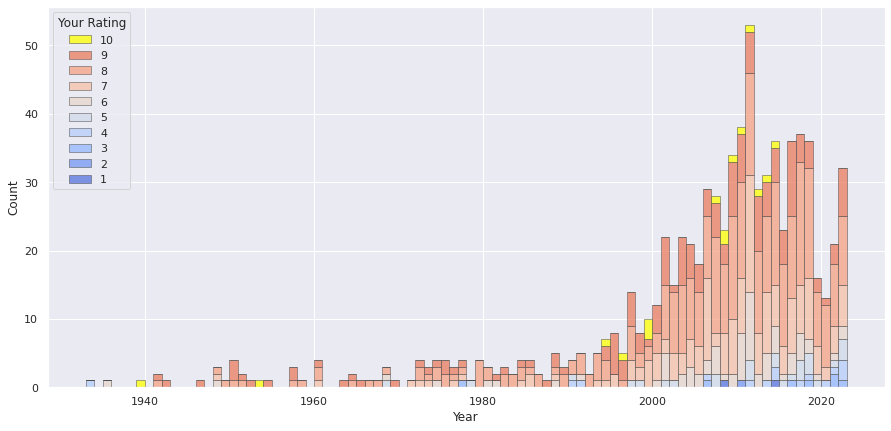

In [41]:
sns.histplot(
    df,
    x="Year", hue="Your Rating",
    multiple="stack",
    hue_order=possible_ratings,
    binwidth=1,
    palette=palette,
    edgecolor=".3",
    linewidth=.5,
)

## per decade

In [43]:
df.Year.min(), df.Year.max()

(1933, 2023)

In [44]:
years_bins = range(1933, 2024, 10)
list(years_bins)

[1933, 1943, 1953, 1963, 1973, 1983, 1993, 2003, 2013, 2023]

<AxesSubplot:xlabel='Year', ylabel='Count'>

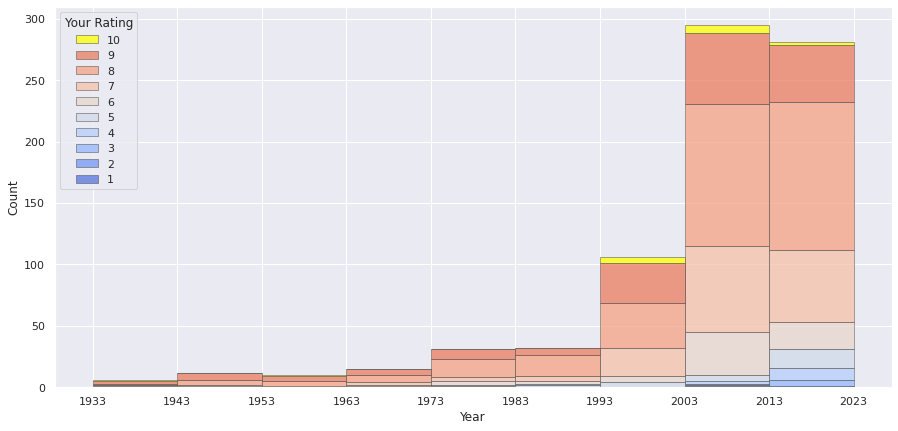

In [45]:
plt.xticks(years_bins)
sns.histplot(
    df,
    x="Year", hue="Your Rating",
    multiple="stack",
    hue_order=possible_ratings,
    bins=years_bins,
    palette=palette,
    edgecolor=".3",
    linewidth=.5,
)

<AxesSubplot:xlabel='Year', ylabel='Count'>

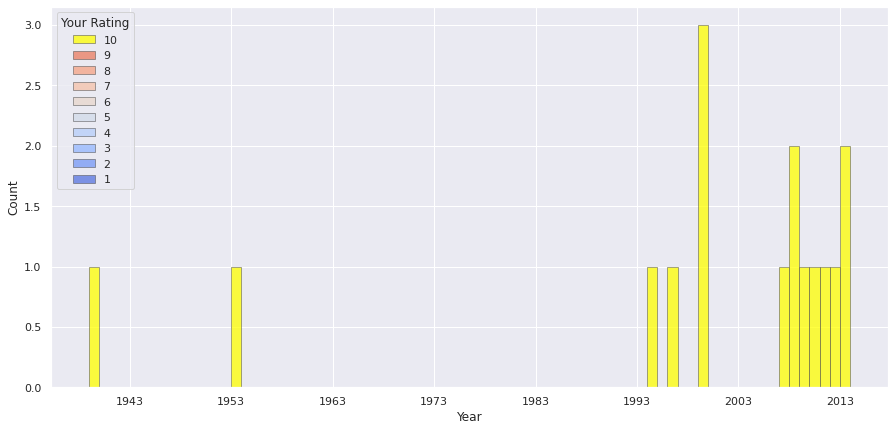

In [46]:
plt.xticks(years_bins)
sns.histplot(
    df[df["Your Rating"] == 10],
    x="Year", hue="Your Rating",
    multiple="stack",
    hue_order=possible_ratings,
    binwidth=1,
    palette=palette,
    edgecolor=".3",
    linewidth=.5,
)


<AxesSubplot:xlabel='Year', ylabel='Count'>

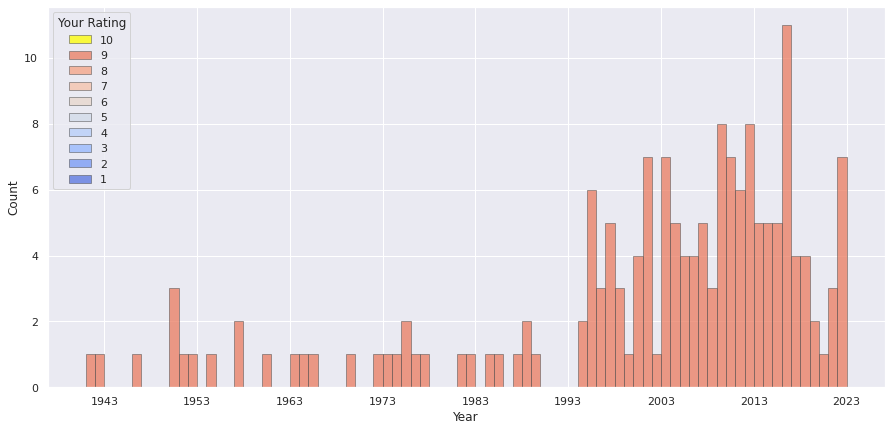

In [47]:
plt.xticks(years_bins)
sns.histplot(
    df[df["Your Rating"] == 9],
    x="Year", hue="Your Rating",
    multiple="stack",
    hue_order=possible_ratings,
    binwidth=1,
    palette=palette,
    edgecolor=".3",
    linewidth=.5,
)


# Genres

In [48]:
df[['Genres']].head(10)

,Genres
0,Drama
1,"Crime, Drama"
2,"Action, Crime, Drama, Thriller"
3,Drama
4,"Action, Adventure, Sci-Fi, Thriller"
5,"Action, Sci-Fi"
6,"Crime, Drama, Mystery, Thriller"
7,"Crime, Drama, Thriller"
8,"Crime, Drama, Mystery, Thriller"
9,"Action, Sci-Fi"


In [49]:
from collections import Counter

all_genres = [g for gs in df['Genres'].values for g in str(gs).split(', ')]
genre_frequencies = Counter(all_genres)

In [50]:
dict(genre_frequencies)

{'Drama': 560,
 'Crime': 131,
 'Action': 131,
 'Thriller': 198,
 'Adventure': 148,
 'Sci-Fi': 126,
 'Mystery': 130,
 'Animation': 93,
 'Family': 88,
 'Fantasy': 124,
 'Comedy': 233,
 'Romance': 171,
 'Biography': 62,
 'History': 24,
 'Western': 8,
 'Music': 27,
 'Musical': 25,
 'Sport': 5,
 'War': 25,
 'Horror': 33,
 'Documentary': 19,
 'Film-Noir': 3,
 'nan': 1,
 'News': 1}

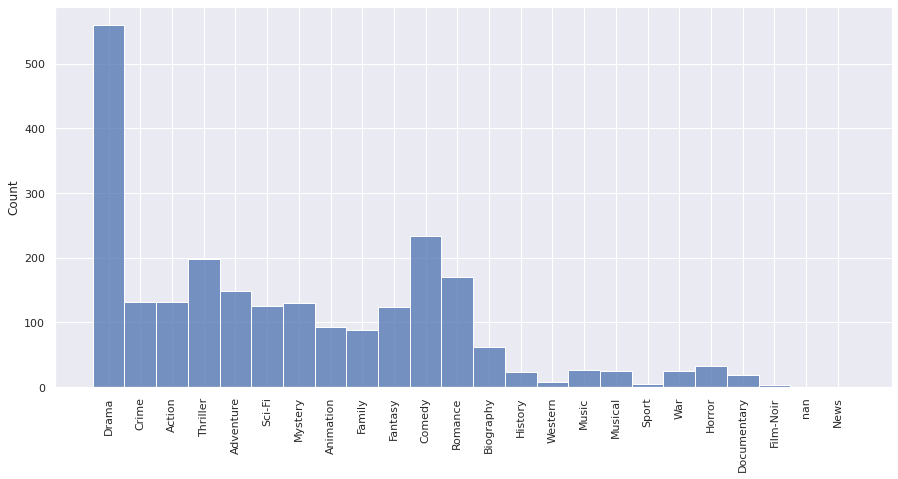

In [51]:
sns.histplot(all_genres)
_ = plt.xticks(rotation=90)

In [52]:
multi_genre_list = [g for g in df['Genres'].values if ', ' in str(g)]
multi_genre_list

['Crime, Drama',
 'Action, Crime, Drama, Thriller',
 'Action, Adventure, Sci-Fi, Thriller',
 'Action, Sci-Fi',
 'Crime, Drama, Mystery, Thriller',
 'Crime, Drama, Thriller',
 'Crime, Drama, Mystery, Thriller',
 'Action, Sci-Fi',
 'Mystery, Thriller',
 'Animation, Adventure, Family, Fantasy, Mystery',
 'Adventure, Comedy, Sci-Fi',
 'Drama, Romance, Sci-Fi',
 'Drama, Mystery, Sci-Fi, Thriller',
 'Action, Adventure, Drama',
 'Drama, Mystery, Thriller',
 'Animation, Action, Adventure, Fantasy',
 'Animation, Adventure, Comedy, Drama, Family',
 'Comedy, Drama, Romance',
 'Biography, Drama, History',
 'Drama, Thriller',
 'Drama, Mystery, Sci-Fi, Thriller',
 'Animation, Action, Adventure, Comedy, Family, Fantasy',
 'Action, Drama, Sci-Fi, Thriller',
 'Animation, Adventure, Comedy, Family',
 'Drama, Romance',
 'Crime, Drama, Mystery, Thriller',
 'Comedy, Drama, Romance',
 'Animation, Adventure, Drama, Family, Fantasy',
 'Animation, Adventure, Comedy, Family',
 'Comedy, Drama',
 'Animation, Adve

In [53]:
multi_genre_counter = Counter(multi_genre_list)
multi_genre_counter.most_common()

[('Comedy, Drama', 46),
 ('Drama, Romance', 41),
 ('Comedy, Drama, Romance', 29),
 ('Crime, Drama, Thriller', 20),
 ('Drama, Thriller', 18),
 ('Crime, Drama, Mystery, Thriller', 17),
 ('Crime, Drama', 14),
 ('Biography, Drama', 12),
 ('Comedy, Romance', 11),
 ('Drama, Mystery, Thriller', 10),
 ('Animation, Adventure, Comedy, Family, Fantasy', 8),
 ('Action, Adventure, Sci-Fi', 8),
 ('Drama, Music', 8),
 ('Action, Drama, Sci-Fi, Thriller', 7),
 ('Mystery, Thriller', 6),
 ('Adventure, Family, Fantasy, Mystery', 6),
 ('Biography, Drama, Romance', 6),
 ('Drama, Fantasy', 6),
 ('Biography, Crime, Drama', 6),
 ('Action, Crime, Drama, Thriller', 5),
 ('Action, Adventure, Sci-Fi, Thriller', 5),
 ('Action, Sci-Fi', 5),
 ('Drama, Sci-Fi, Thriller', 5),
 ('Drama, Sci-Fi', 5),
 ('Drama, Mystery', 5),
 ('Action, Adventure, Fantasy, Sci-Fi', 5),
 ('Horror, Mystery, Thriller', 5),
 ('Drama, Romance, Sci-Fi', 4),
 ('Drama, Mystery, Sci-Fi, Thriller', 4),
 ('Biography, Drama, History', 4),
 ('Animation

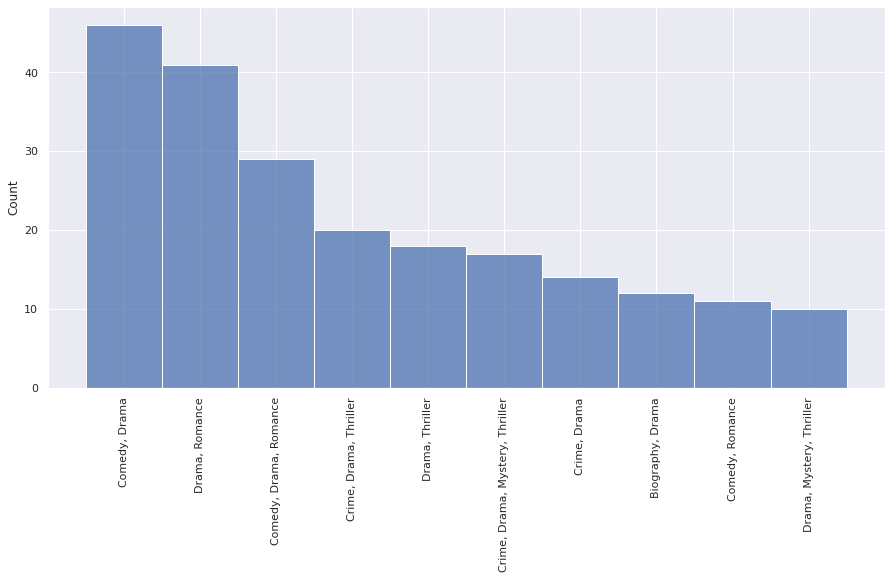

In [54]:
sns.histplot([g for gs in [[g]*c for g, c in multi_genre_counter.most_common(10)] for g in gs] )
_ = plt.xticks(rotation=90)

In [55]:
genre_connections = {}

for gs, c in Counter(multi_genre_list).most_common():
    g, *others = sorted(gs.split(', '))
    for o in others:
        if (g, o) not in genre_connections:
            genre_connections[(g, o)] = 0
        genre_connections[(g, o)] += c

In [56]:
genre_connections

{('Comedy', 'Drama'): 101,
 ('Drama', 'Romance'): 69,
 ('Comedy', 'Romance'): 53,
 ('Crime', 'Drama'): 69,
 ('Crime', 'Thriller'): 54,
 ('Drama', 'Thriller'): 49,
 ('Crime', 'Mystery'): 27,
 ('Biography', 'Drama'): 55,
 ('Drama', 'Mystery'): 38,
 ('Adventure', 'Animation'): 40,
 ('Adventure', 'Comedy'): 43,
 ('Adventure', 'Family'): 49,
 ('Adventure', 'Fantasy'): 43,
 ('Action', 'Adventure'): 73,
 ('Action', 'Sci-Fi'): 65,
 ('Drama', 'Music'): 13,
 ('Action', 'Drama'): 47,
 ('Action', 'Thriller'): 52,
 ('Mystery', 'Thriller'): 8,
 ('Adventure', 'Mystery'): 17,
 ('Biography', 'Romance'): 11,
 ('Drama', 'Fantasy'): 16,
 ('Biography', 'Crime'): 12,
 ('Action', 'Crime'): 20,
 ('Drama', 'Sci-Fi'): 30,
 ('Action', 'Fantasy'): 37,
 ('Horror', 'Mystery'): 8,
 ('Horror', 'Thriller'): 8,
 ('Biography', 'History'): 12,
 ('Drama', 'Family'): 5,
 ('Comedy', 'Fantasy'): 12,
 ('Comedy', 'Crime'): 13,
 ('Animation', 'Drama'): 24,
 ('Animation', 'Fantasy'): 11,
 ('Animation', 'Romance'): 12,
 ('Crime',

In [57]:
import networkx as nx

In [58]:
G = nx.Graph()

In [59]:
for nodes, weight in genre_connections.items():
    G.add_edge(nodes[0], nodes[1], weight=weight)

In [60]:
# pip install netgraph

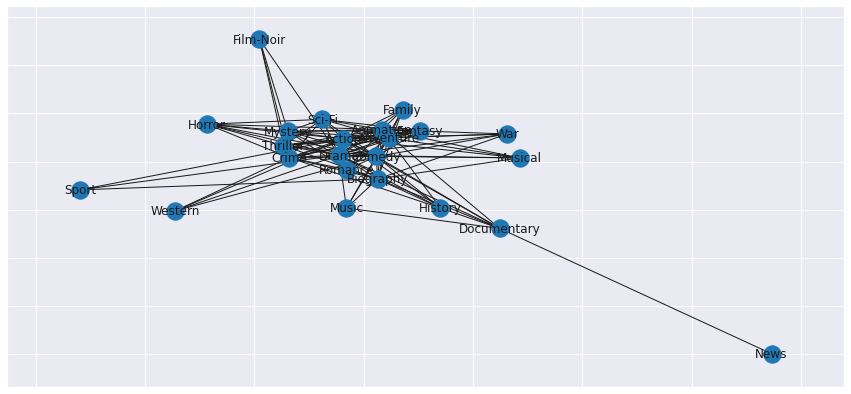

In [61]:
node_degree = dict(G.degree(weight='weight'))

pos = nx.spring_layout(G, seed=2)
labels = nx.get_edge_attributes(G,'weight')

# nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

nx.draw_networkx(G, pos)

In [62]:
# ! pip install -q pyvis

In [63]:
from pyvis.network import Network
net = Network('700px', '700px', notebook=True)

In [64]:
net.from_nx(G)

In [77]:
net.show('nx.html')

nx.html


## Through the years

In [66]:
df['Year added'] = df['Date Rated'].str.split('-').str[0]

<AxesSubplot:xlabel='Year added', ylabel='Count'>

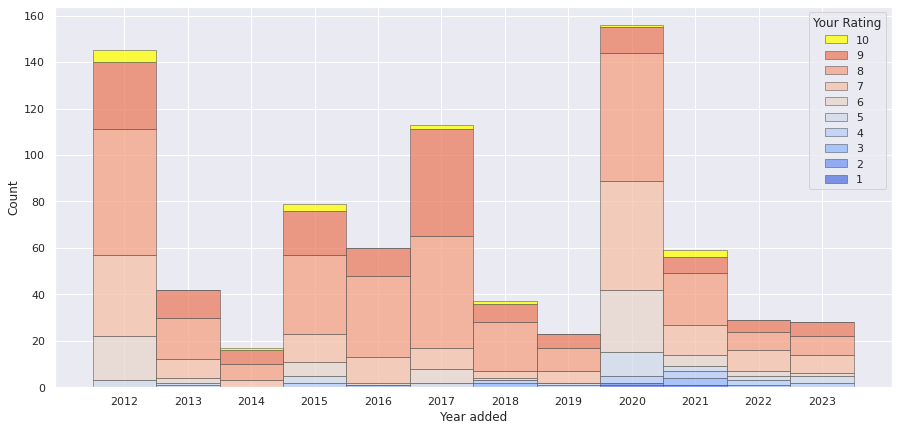

In [67]:
sns.histplot(
    df.sort_values(['Year added']),
    x="Year added", hue="Your Rating",
    multiple="stack",
    hue_order=possible_ratings,
    binwidth=1,
    palette=palette,
    edgecolor=".3",
    linewidth=.5,
)

<AxesSubplot:xlabel='Year added', ylabel='Count'>

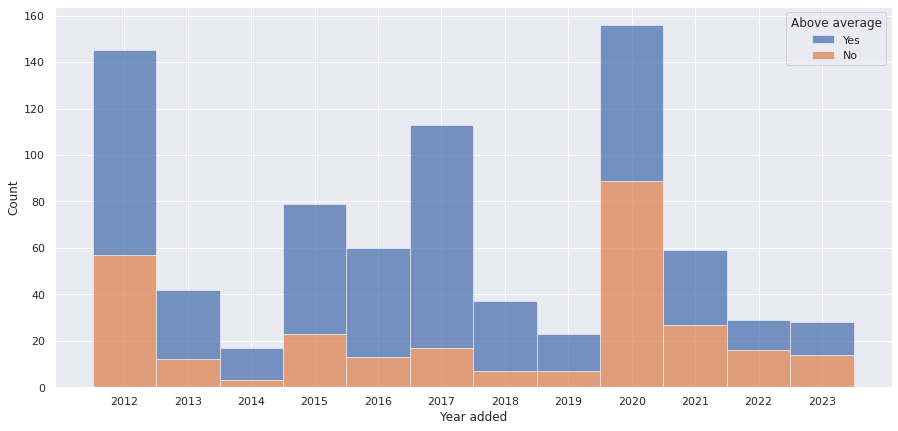

In [68]:
sns.histplot(
    df.sort_values(['Year added']),
    x="Year added", hue="Above average",
    multiple="stack",
    binwidth=1,
    linewidth=.5,
)

## Directors

In [69]:
df.Directors.value_counts()[:20]

Christopher Nolan        9
Steven Spielberg         9
David Fincher            8
Makoto Shinkai           6
Richard Linklater        6
Alejandro G. Iñárritu    6
Quentin Tarantino        6
Ethan Coen, Joel Coen    6
Martin Scorsese          6
Paul Thomas Anderson     6
Rob Marshall             5
Denis Villeneuve         5
Danny Boyle              5
Darren Aronofsky         5
Alfred Hitchcock         5
Wes Anderson             5
Stanley Kubrick          5
James Cameron            4
Asghar Farhadi           4
Yorgos Lanthimos         4
Name: Directors, dtype: int64

In [70]:
director_scores = pd.DataFrame(df.groupby('Directors').agg({'Directors':'size', 'Your Rating':'mean'}).rename(columns={'Directors':'Number of movies watched','Your Rating':'Your Average Rating'})).sort_values(['Your Average Rating'], ascending=False)
director_scores.head(20)

,Number of movies watched,Your Average Rating
Directors,,
"Mervyn LeRoy, King Vidor, Norman Taurog, George Cukor, Richard Thorpe, Victor Fleming",1,10.0
"Lisanne Pajot, James Swirsky",1,10.0
"Lilly Wachowski, Lana Wachowski",1,10.0
Yasujirô Ozu,1,10.0
"Christopher Miller, Phil Lord",1,10.0
"Olivier Nakache, Éric Toledano",1,10.0
John Patrick Shanley,1,10.0
Charlie Kaufman,2,9.5
Kelly Fremon Craig,1,9.0


In [71]:
all_directors = [(d, s) for ds, s in zip(df.Directors, df["Your Rating"]) for d in str(ds).split(', ')]
directors_df = pd.DataFrame(all_directors, columns=["Director", "Rating"])

In [72]:
directors_df

,Director,Rating
0,Frank Darabont,10
1,Francis Ford Coppola,7
2,Christopher Nolan,8
3,David Fincher,9
4,Christopher Nolan,9
...,...,...
918,Rob Marshall,7
919,Jonathan Goldstein,8
920,John Francis Daley,8
921,James Mangold,4


In [73]:
len(directors_df["Director"].unique())

627

In [74]:
len(director_scores[director_scores["Number of movies watched"] > 3])

29

In [75]:
director_scores = pd.DataFrame(directors_df.groupby('Director').agg({'Director':'size', 'Rating':'mean'}).rename(columns={'Director':'Number of movies watched','Rating':'Your Average Rating'})).sort_values(['Your Average Rating'], ascending=False)
director_scores[director_scores["Number of movies watched"] > 2].head(20)

,Number of movies watched,Your Average Rating
Director,,
Charlie Kaufman,3,9.333333
Paul Thomas Anderson,6,8.833333
Asghar Farhadi,4,8.750000
Martin McDonagh,4,8.750000
Park Chan-wook,4,8.750000
Federico Fellini,3,8.666667
Richard Linklater,6,8.666667
Steve McQueen,3,8.666667
David Fincher,8,8.625000


In [79]:
directors_df[directors_df["Rating"] == 10]

,Director,Rating
0,Frank Darabont,10
5,Lilly Wachowski,10
6,Lana Wachowski,10
132,Rajkumar Hirani,10
206,Makoto Shinkai,10
208,M. Night Shyamalan,10
223,Olivier Nakache,10
224,Éric Toledano,10
271,Spike Jonze,10
279,Lisanne Pajot,10


# Querying Wikidata

In [81]:
# !pip install mkwikidata

In [136]:
import mkwikidata as wkd
from tqdm.notebook import tqdm
import time

In [98]:
query = "select ?movie ?r ?o where {?movie wdt:P345 'tt0111161'. ?movie ?r ?o.} LIMIT 100"
query_result = wkd.run_query(query, params={})
query_result

{'head': {'vars': ['movie', 'r', 'o']},
 'results': {'bindings': [{'movie': {'type': 'uri',
     'value': 'http://www.wikidata.org/entity/Q172241'},
    'r': {'type': 'uri', 'value': 'http://schema.org/version'},
    'o': {'datatype': 'http://www.w3.org/2001/XMLSchema#integer',
     'type': 'literal',
     'value': '1915883387'}},
   {'movie': {'type': 'uri',
     'value': 'http://www.wikidata.org/entity/Q172241'},
    'r': {'type': 'uri', 'value': 'http://schema.org/dateModified'},
    'o': {'datatype': 'http://www.w3.org/2001/XMLSchema#dateTime',
     'type': 'literal',
     'value': '2023-06-15T15:23:49Z'}},
   {'movie': {'type': 'uri',
     'value': 'http://www.wikidata.org/entity/Q172241'},
    'r': {'type': 'uri', 'value': 'http://schema.org/description'},
    'o': {'xml:lang': 'sq', 'type': 'literal', 'value': 'film'}},
   {'movie': {'type': 'uri',
     'value': 'http://www.wikidata.org/entity/Q172241'},
    'r': {'type': 'uri', 'value': 'http://schema.org/description'},
    'o'

# Get All Metadata

In [139]:
movies_data = {}
for movie_url in tqdm(df["URL"]):
    imdb_id = movie_url.split('/')[-2]
    query = f"select ?movie ?r ?o where {{?movie wdt:P345 '{imdb_id}'. ?movie ?r ?o.}} LIMIT 100"
    query_result = wkd.run_query(query, params={})
    if(len(query_result['results']['bindings']) > 0):
        movies_data[imdb_id] = query_result
    else:
        print(f"Movie with IMDB id {imdb_id} not found")
    time.sleep(1)

  0%|          | 0/788 [00:00<?, ?it/s]

Movie with IMDB id tt1740055 not found
Movie with IMDB id tt0106362 not found
Movie with IMDB id tt2066040 not found
Movie with IMDB id tt4779296 not found
Movie with IMDB id tt1576420 not found
Movie with IMDB id tt12476620 not found
Movie with IMDB id tt11198810 not found


In [141]:
movies_data['tt0111161']['results']['bindings']

[{'movie': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q172241'},
  'r': {'type': 'uri', 'value': 'http://schema.org/version'},
  'o': {'datatype': 'http://www.w3.org/2001/XMLSchema#integer',
   'type': 'literal',
   'value': '1915883387'}},
 {'movie': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q172241'},
  'r': {'type': 'uri', 'value': 'http://schema.org/dateModified'},
  'o': {'datatype': 'http://www.w3.org/2001/XMLSchema#dateTime',
   'type': 'literal',
   'value': '2023-06-15T15:23:49Z'}},
 {'movie': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q172241'},
  'r': {'type': 'uri', 'value': 'http://schema.org/description'},
  'o': {'xml:lang': 'sq', 'type': 'literal', 'value': 'film'}},
 {'movie': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q172241'},
  'r': {'type': 'uri', 'value': 'http://schema.org/description'},
  'o': {'xml:lang': 'fr', 'type': 'literal', 'value': 'film sorti en 1994'}},
 {'movie': {'type': 'uri', 'value': 'http:

In [ ]:
movies_data = {}
for movie_url in tqdm(df["URL"]):
    imdb_id = movie_url.split('/')[-2]
    query = f"select ?movie ?r ?o where {{?movie wdt:P345 '{imdb_id}'. ?movie ?r ?o.}} LIMIT 100"
    query_result = wkd.run_query(query, params={})
    if(len(query_result['results']['bindings']) > 0):
        movies_data[imdb_id] = query_result
    else:
        print(f"Movie with IMDB id {imdb_id} not found")
    time.sleep(1)

In [142]:
screenwriters = {}
for movie_url in tqdm(df["URL"]):
    imdb_id = movie_url.split('/')[-2]
    query = f"select ?movie ?screenwriter where {{?movie wdt:P345 '{imdb_id}'. ?movie wdt:P58 ?s. ?s wdt:P1559 ?screenwriter}}"
    try:
        query_result = wkd.run_query(query, params={"imdb_id": imdb_id})
        if(len(query_result['results']['bindings']) > 0):
            screenwriters[movie_url] = [binding['screenwriter']['value'] for binding in query_result['results']['bindings']]
        else:
            print(f"Movie with IMDB id {imdb_id} not found")
        time.sleep(1)
    except Exception as e:
        print(f'IMDB_id={imdb_id}, Exception raised during query:' + str(e)[:50])

  0%|          | 0/788 [00:00<?, ?it/s]

Movie with IMDB id tt0102926 not found
Movie with IMDB id tt0114369 not found
Movie with IMDB id tt0172495 not found
Movie with IMDB id tt0947798 not found
Movie with IMDB id tt0246578 not found
Movie with IMDB id tt0434409 not found
Movie with IMDB id tt0327056 not found
Movie with IMDB id tt1306980 not found
Movie with IMDB id tt0268380 not found
Movie with IMDB id tt0315733 not found
Movie with IMDB id tt0289879 not found
Movie with IMDB id tt1192628 not found
Movie with IMDB id tt0448694 not found
Movie with IMDB id tt1436562 not found
Movie with IMDB id tt0351283 not found
Movie with IMDB id tt0120587 not found
Movie with IMDB id tt0945513 not found
Movie with IMDB id tt0780504 not found
Movie with IMDB id tt0373889 not found
Movie with IMDB id tt1615147 not found
Movie with IMDB id tt1219289 not found
Movie with IMDB id tt1340800 not found
Movie with IMDB id tt0241223 not found
Movie with IMDB id tt1007029 not found
Movie with IMDB id tt1616195 not found
Movie with IMDB id tt0268

Movie with IMDB id tt1839494 not found
Movie with IMDB id tt0918927 not found
Movie with IMDB id tt0385004 not found
Movie with IMDB id tt4034228 not found
Movie with IMDB id tt3553976 not found
Movie with IMDB id tt4975722 not found
Movie with IMDB id tt2671706 not found
Movie with IMDB id tt5311514 not found
Movie with IMDB id tt4034354 not found
Movie with IMDB id tt3544112 not found
Movie with IMDB id tt2582782 not found
Movie with IMDB id tt1878870 not found
Movie with IMDB id tt3470600 not found
Movie with IMDB id tt4048272 not found
Movie with IMDB id tt3741834 not found
Movie with IMDB id tt2119532 not found
Movie with IMDB id tt4080728 not found
Movie with IMDB id tt3416532 not found
Movie with IMDB id tt3766394 not found
Movie with IMDB id tt4302938 not found
Movie with IMDB id tt1133989 not found
Movie with IMDB id tt0119174 not found
Movie with IMDB id tt0064665 not found
Movie with IMDB id tt5052448 not found
Movie with IMDB id tt0360486 not found
Movie with IMDB id tt0118

In [130]:
screenwriters

{'https://www.imdb.com/title/tt0111161/': ['Stephen King', 'Frank Darabont']}